In [264]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/commands')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib.gridspec import GridSpec
from readTrc_4CH import Trc
from cluster_finder import cfinder
from PIL import Image
from tqdm import tqdm
import math
from scipy.integrate import simpson
import matplotlib as mpl
import scipy.signal as sig
from scipy.ndimage import rotate
pd.set_option("display.max_columns",150)
datafile = pd.read_csv('/eos/experiment/gbar/datasummary/datafile24.txt', delimiter = '\t')

In [239]:
df = datafile[[True if (428<=val<=451 or 458<=val<=481 or 487<=val<=512 or 521<=val<=545) else False for val in datafile.run]]
df = df[df.MCP5 != 'None']
df = df[df.NE50_I >= 2]
df = df[df['5_mcp_+'] > 2150]
#df = pd.concat([df[df.Date == '24_05_23'], df[df.Date == '24_05_24']])
df = df[df.Date == '24_05_29']
fl = list(df.MCP5)
center = [725, 530]
cir_rad = 455

In [3]:
def gaussfunc(x,s):
    return 1/(s*(2*np.pi)**0.5) * np.exp(-1/2 * x**2/s**2)

def gaussarr(s):
    xl = np.linspace(-3*s, 3*s, 6*s+1)
    gauss_arr = [gaussfunc(val,s) for val in xl]
    return gauss_arr

In [308]:
arr = np.zeros((1040,1392))

for i in tqdm(range(len(fl))):    
    temp_arr = np.array(Image.open(fl[i]))
    
    for z in range(len(temp_arr)):
        for k in range(len(temp_arr[0])):
            if math.floor(((z-center[1])**2+(k-center[0])**2)**0.5) < cir_rad:
                arr[z][k] += temp_arr[z][k]/len(fl)
                

100%|██████████| 22/22 [01:32<00:00,  4.21s/it]


In [331]:
len(arr[center[1]-cir_rad+1:center[1]+cir_rad])

909

In [386]:
arrb = np.array([[val for val in bal[center[0]-cir_rad+1:center[0]+cir_rad]] for bal in arr[center[1]-cir_rad+1:center[1]+cir_rad]])
arrb = rotate(arrb, angle = 45, reshape = False)

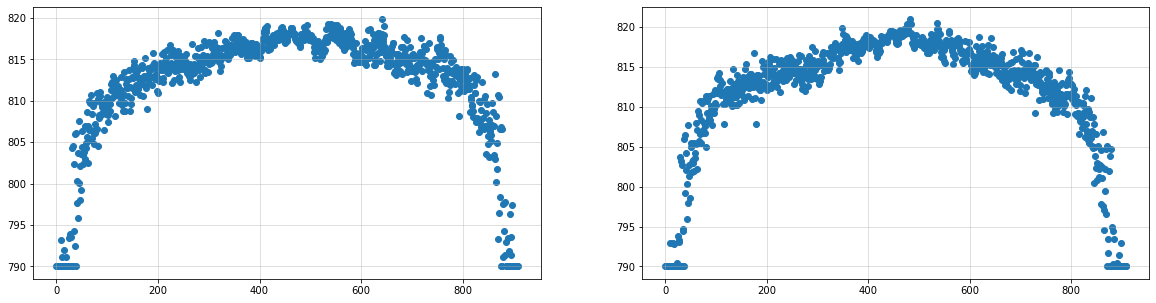

In [370]:
#arrb = rotate(arrb, angle = 45, reshape = False)
arrb = [[val if val>1 else 0 for val in bal] for bal in arrb]

totxb = [sum(val)/max(1,len([1 for bal in val if bal > 0])) for val in np.transpose(arrb)]
totyb = [sum(val)/max(1,len([1 for bal in val if bal > 0])) for val in arrb]

totxcb = [val if val > 790 else 790 for val in totxb]
totycb = [val if val > 790 else 790 for val in totyb]

xl = list(range(0,len(totxcb),1))
yl = list(range(0,len(totycb),1))

fig = plt.figure(figsize = (20,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.grid(alpha = 0.5)
ax1.grid(alpha = 0.5)

ax0.scatter(xl, totxcb)
ax1.scatter(yl, totycb)

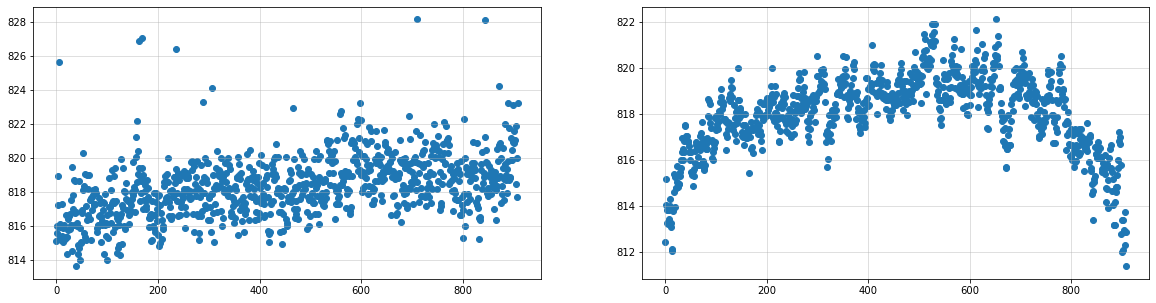

In [350]:
totx = [sum(val)/max(1,len([1 for bal in val if bal > 0])) for val in np.transpose(arr)]
toty = [sum(val)/max(1,len([1 for bal in val if bal > 0])) for val in arr]

totxc = [val for val in totx if val > 0]
totyc = [val for val in toty if val > 0]

xl = list(range(0,909,1))
yl = list(range(0,909,1))

fig = plt.figure(figsize = (20,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.grid(alpha = 0.5)
ax1.grid(alpha = 0.5)

ax0.scatter(xl, totxc)
ax1.scatter(yl, totyc)

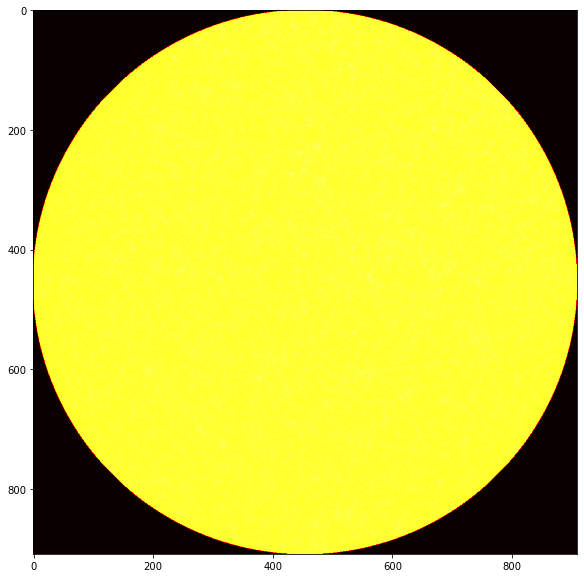

In [395]:
arrbb = np.array(arrb.copy())
arrbb[arrbb < 1] = 0
#arrbb[arrbb > 900] = 900
#arrbb[arrbb < 800] = 800

fig = plt.figure(figsize = (10,10))
plt.imshow(arrbb, cmap = 'hot')

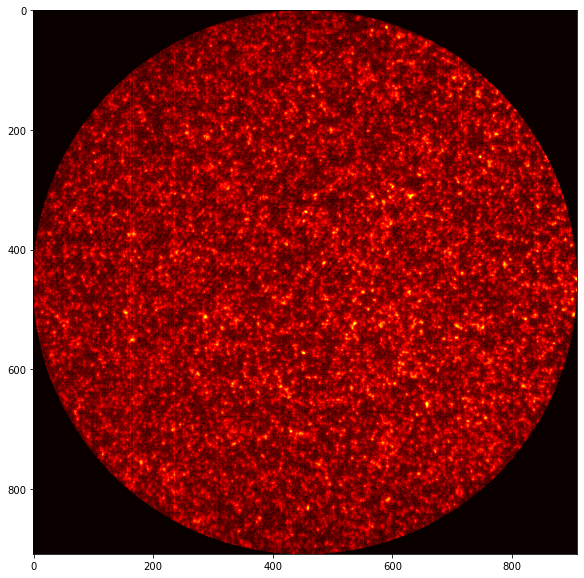

In [385]:
arraa = np.array([[val for val in bal[center[0]-cir_rad+1:center[0]+cir_rad]] for bal in arr[center[1]-cir_rad+1:center[1]+cir_rad]]).copy()
arraa[arraa > 900] = 900
arraa[arraa < 800] = 800

fig = plt.figure(figsize = (10,10))
plt.imshow(arraa, cmap = 'hot')

In [396]:
arrbb[350]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 352.15493552,
       821.37100727, 776.98805647, 810.46072924, 815.45088607,
       811.23784694, 809.69536701, 807.52283583, 819.43892849,
       810.500824  , 805.93929992, 811.02665996, 802.3230392 ,
       810.67128516, 813.21998176, 810.20003476, 809.05492808,
       812.12766195, 809.24484908, 810.20715192, 809.28052218,
       815.00001921, 815.39604939, 826.36011696, 828.38018344,
       825.70187185, 823.53146953, 824.82257991, 827.14895643,
       831.92215679, 825.67690406, 835.74607984, 814.57428663,
       809.58994187, 810.12312488, 813.24582481, 809.61674802,
       815.06394183, 814.91836681, 807.0287223 , 812.91106318,
       815.57529015, 806.44855732, 812.86134934, 819.73008864,
       824.32930279, 826.67241021, 824.43244223, 816.97763785,
       816.95493978, 817.16775101, 818.41421962, 808.22

In [379]:
len([val for bal in arrb for val in bal if 0<val<700])

4630

In [240]:
totx = np.zeros(1392)
numx = np.zeros(1392)
toty = np.zeros(1040)
numy = np.zeros(1040)

for i in tqdm(range(len(fl))):    
    temp_arr = np.array(Image.open(fl[i]))
    
    for z in range(len(temp_arr)):
        for k in range(len(temp_arr[0])):
            if math.floor(((z-center[1])**2+(k-center[0])**2)**0.5) < cir_rad:
                totx[k] += temp_arr[z][k]
                numx[k] += 1
                toty[z] += temp_arr[z][k]
                numy[z] += 1
                

100%|██████████| 22/22 [01:08<00:00,  3.11s/it]


In [255]:
totx = [val for val in totx if val>0]
numx = [val for val in numx if val>0]
totxc = [val/bal for val,bal in zip(totx,numx)]

toty = [val for val in toty if val>0]
numy = [val for val in numy if val>0]
totyc = [val/bal for val,bal in zip(toty,numy)]

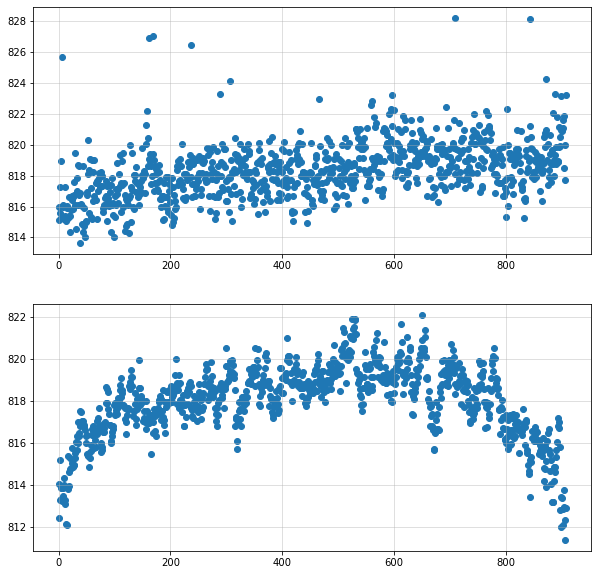

In [256]:
xl = list(range(0,909,1))
yl = list(range(0,909,1))

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

ax0.grid(alpha = 0.5)
ax1.grid(alpha = 0.5)

ax0.scatter(xl, totxc)
ax1.scatter(yl, totyc)

In [6]:
px = [0]*1392
py = [0]*1040

for k in tqdm(range(len(df))):
    arr = np.array(Image.open(fl[k]))
    thresh = np.average(arr)+3*np.std(arr)
    carr = arr.copy()
    #carr[carr<thresh] = 0.0001
    avx = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in np.transpose(carr)]
    avy = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in carr]
    hx = [avx[i] for i in range(0,len(carr[0]),1)]
    hy = [avy[i] for i in range(0,len(carr),1)]
    px = [val+bal for val,bal in zip(px,hx)]
    py = [val+bal for val,bal in zip(py,hy)]

100%|██████████| 22/22 [01:51<00:00,  5.09s/it]


In [7]:
px = [val/sum(px) for val in px]
py = [val/sum(py) for val in py]

pxx = px[center[0]-cir_rad:center[0]+cir_rad+1]
pyy = py[center[1]-cir_rad:center[1]+cir_rad+1]

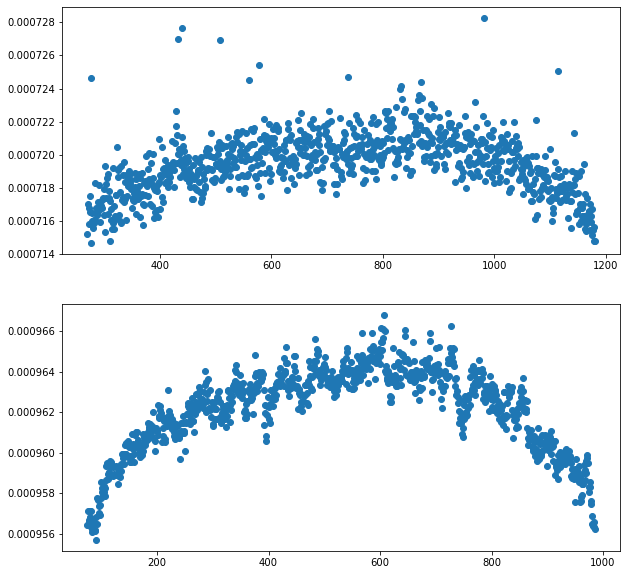

In [8]:
rangesx = list(range(0,1392,1))
rangesy = list(range(0,1040,1))

rangesxx = rangesx[center[0]-cir_rad:center[0]+cir_rad+1]
rangesyy = rangesy[center[1]-cir_rad:center[1]+cir_rad+1]

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

ax0.scatter(rangesxx, pxx)
#ax0.axvline(867, linestyle = '--', c = 'k', alpha = 0.6)
ax1.scatter(rangesyy, pyy)
#ax1.axvline(601, linestyle = '--', c = 'k', alpha = 0.6)

#ax0.set_xlim(400, 1200)
#ax0.set_ylim(0.001, 0.00115)
#ax1.set_xlim(200, 800)

In [222]:
cla = pd.DataFrame(columns = ['xpos','ypos','size','sum'])

for i in range(len(fl)):
    temp_cl = cfinder(fl[i])
    cla = pd.concat([cla,temp_cl])

In [223]:
max(cla.xpos), min(cla.xpos), max(cla.xpos)-min(cla.xpos), max(cla.ypos), min(cla.ypos), max(cla.ypos)-min(cla.ypos)

(987, 72, 915, 1185, 266, 919)

In [173]:
center[0]-cir_rad, center[0]+cir_rad, center[1]-cir_rad, center[1]+cir_rad

(270, 1180, 75, 985)

In [165]:
tst = [(1-(abs(bal-center[0])/cir_rad)**2)**0.5 if center[0]-cir_rad<=bal<=center[0]+cir_rad else 0 for bal in range(0,1392,1)]

In [210]:
xx_corr[273], xxa[273], 1/np.cos(np.arcsin(abs(273-725)/455))

(8.722623472052891, 8.722623472052891, 8.722623472052874)

In [212]:
(455**2-abs(273-725)**2)**0.5, 455/(455**2-abs(273-725)**2)**0.5

(52.16320542297991, 8.722623472052868)

In [217]:
sum([bal for val,bal in zip(xx,ss) if val < 725]), sum([bal for val,bal in zip(xx,ss) if val > 725])

(57363, 66106)

In [ ]:
len()

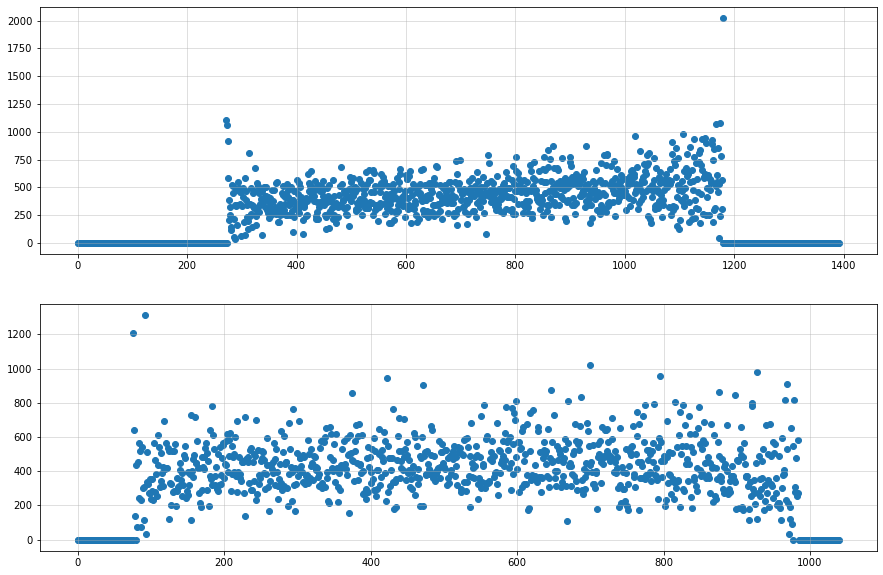

In [237]:
step = 1

yy = list(cla.xpos)
xx = list(cla.ypos)
ss = list(cla['size'])

xx_corr = [min(1/(0.0001+(1-(abs(bal-center[0]+step/2)/cir_rad)**2)**0.5),20) if center[0]-cir_rad<bal<center[0]+cir_rad else 0 for bal in range(0,1392,step)]
yy_corr = [min(1/(0.0001+(1-(abs(bal-center[1]+step/2)/cir_rad)**2)**0.5),20) if center[1]-cir_rad<bal<center[1]+cir_rad else 0 for bal in range(0,1040,step)]

#xxa = [len([1 for val in xx if bal<=val<bal+step])*kal for bal,kal in zip(range(0,1392,step),xx_corr)]
#yya = [len([1 for val in yy if bal<=val<bal+step])*kal for bal,kal in zip(range(0,1040,step),yy_corr)]

xxa = [sum([tal for val,tal in zip(xx,ss) if bal<=val<bal+step])*kal for bal,kal in zip(range(0,1392,step),xx_corr)]
yya = [sum([tal for val,tal in zip(yy,ss) if bal<=val<bal+step])*kal for bal,kal in zip(range(0,1040,step),yy_corr)]

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

ax0.grid(alpha = 0.5)
ax1.grid(alpha = 0.5)

#ax0.set_xlim(260, 1190)
#ax1.set_xlim(65, 995)

ax0.scatter(range(0,1392,step),xxa)
ax1.scatter(range(0,1040,step),yya)

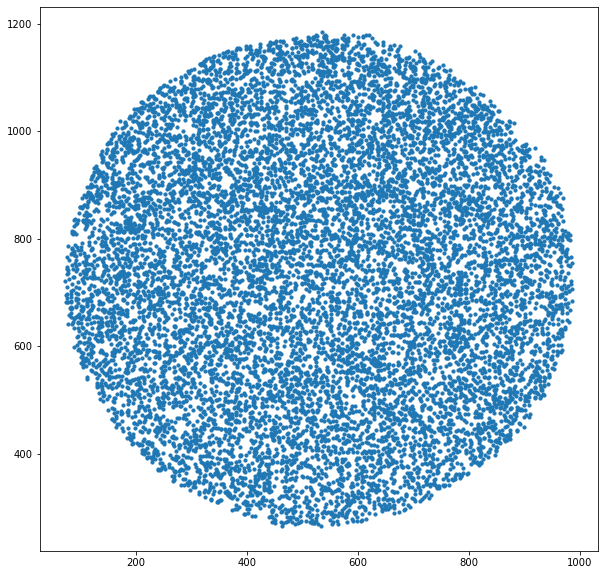

In [230]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cla.xpos,cla.ypos, s = 10)

In [117]:
arra = np.zeros((1040,1392))

for i in tqdm(range(len(fl))):
    #if i in [1, 7, 8]: continue
    
    temp_arr = np.array(Image.open(fl[i]))
    temp_thresh = np.average(temp_arr)+3*np.std(temp_arr)
    
    for z in range(len(temp_arr)):
        for k in range(len(temp_arr[0])):
            if math.floor(((z-center[1])**2+(k-center[0])**2)**0.5) >= cir_rad:# or center[1]-50<z<center[1]+50:
                temp_arr[z,k] = 0
    
    #print(i, np.average([sum(val[1140:1178]) for val in temp_arr][500:550]), np.average([sum(val[800:838]) for val in temp_arr][500:550]))
    
    #temp_arr[temp_arr<temp_thresh] = 0.001
    arra += temp_arr
    
carra = arra.copy()
#carra[carr<thresh] = 0.0001

avxa = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in np.transpose(carra)]
avya = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in carra]

 12%|█▎        | 1/8 [00:02<00:14,  2.13s/it]

0 31264.88 31245.44


 25%|██▌       | 2/8 [00:04<00:12,  2.05s/it]

1 30863.12 31166.08


 38%|███▊      | 3/8 [00:06<00:10,  2.02s/it]

2 31384.16 31332.32


 50%|█████     | 4/8 [00:08<00:08,  2.03s/it]

3 30995.76 30970.08


 62%|██████▎   | 5/8 [00:10<00:06,  2.02s/it]

4 31746.4 31064.96


 75%|███████▌  | 6/8 [00:12<00:04,  2.01s/it]

5 30739.92 31548.16


 88%|████████▊ | 7/8 [00:14<00:02,  2.02s/it]

6 30813.52 31008.8


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]

7 31413.6 31098.64


In [118]:
print(np.average([sum(val[1140:1178]) for val in arra][500:550]), np.average([sum(val[800:838]) for val in arra][500:550]))

249221.36 249434.48


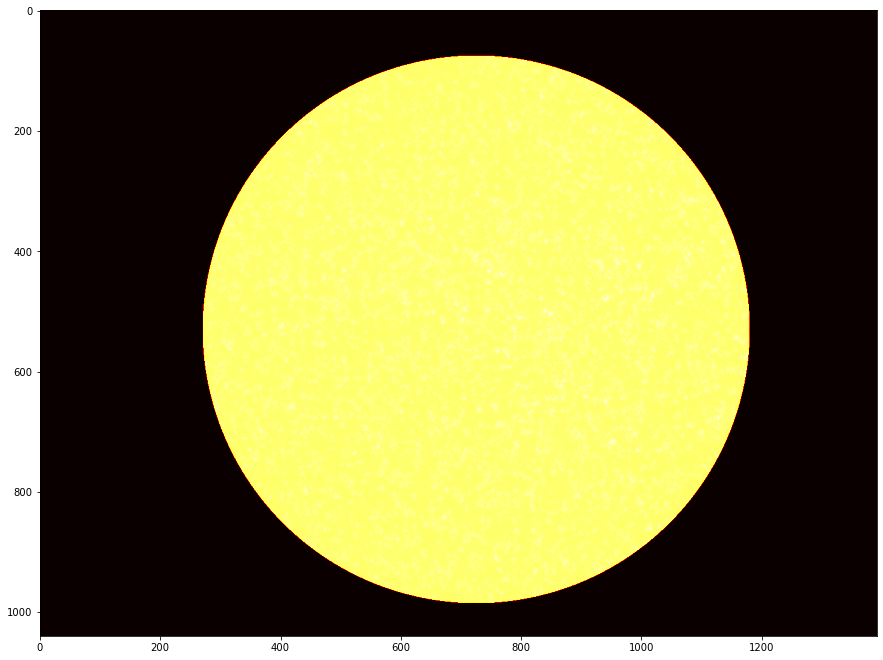

In [119]:
fig = plt.figure(figsize = (15,15))
plt.imshow(arra, cmap = 'hot')

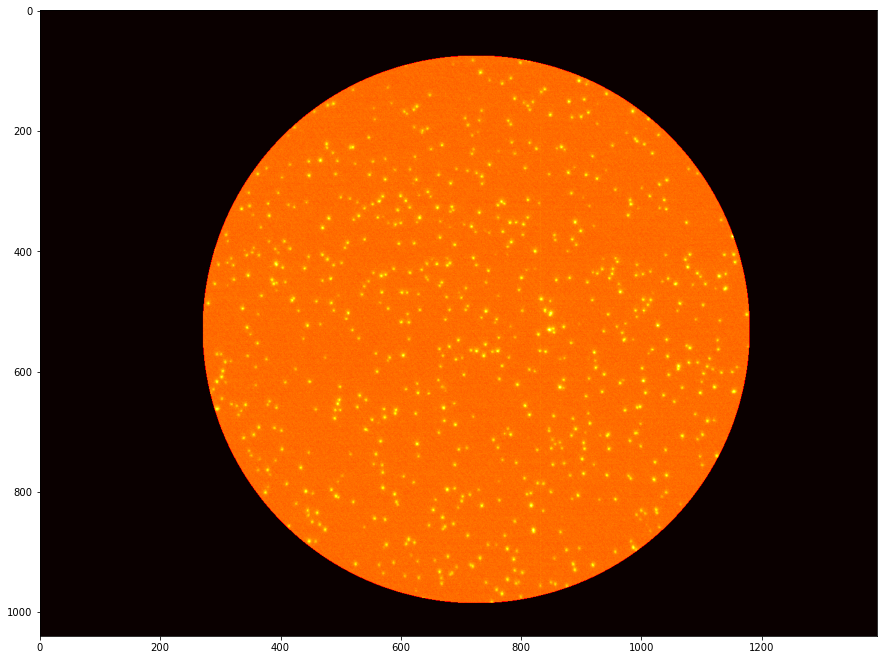

In [104]:
cont_arr = np.array(Image.open(fl[1]))

for z in range(len(cont_arr)):
    for k in range(len(cont_arr[0])):
        if math.floor(((z-center[1])**2+(k-center[0])**2)**0.5) >= cir_rad:
            cont_arr[z,k] = 0

fig = plt.figure(figsize = (15,15))
plt.imshow(cont_arr, cmap = 'hot')

In [105]:
np.average([val[1179] for val in arra][500:550])

6525.36

In [106]:
np.average([val[800] for val in arra][500:550])

6614.56

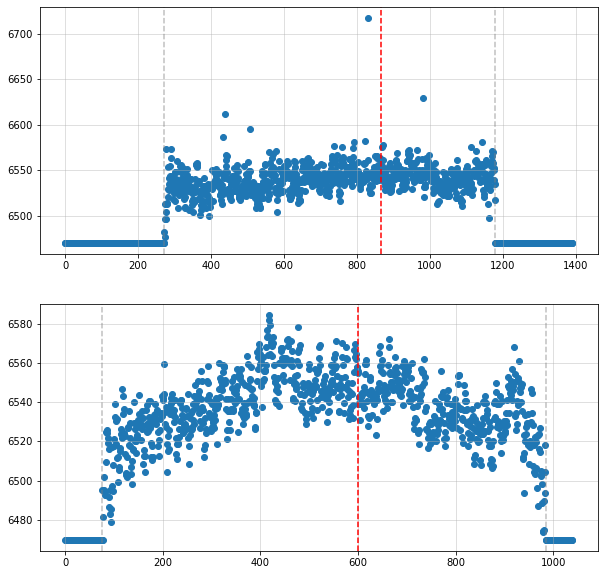

In [121]:
stepa = 1
rangesxa = list(range(0,len(carra[0]),stepa))
rangesya = list(range(0,len(carra),stepa))

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

hxa = [sum(avxa[i:i+stepa])/max(1, len([1 for val in avxa[i:i+stepa] if val > 0])) for i in range(0,len(carra[0]),stepa)]
hya = [sum(avya[i:i+stepa])/max(1, len([1 for val in avya[i:i+stepa] if val > 0])) for i in range(0,len(carra),stepa)]

hxa = [val if val>1 else min([val for val in hxa if val > 1]) for val in hxa]
hya = [val if val>1 else min([val for val in hya if val > 1]) for val in hya]

ax0.scatter(rangesxa, hxa)
ax0.grid(alpha = 0.5)
ax0.axvline(867, linestyle = '--', c = 'r', alpha = 1)
ax0.axvline(center[0]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax0.axvline(center[0]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

ax1.scatter(rangesya, hya)
ax1.grid(alpha = 0.5)
ax1.axvline(601, linestyle = '--', c = 'r', alpha = 1)
ax1.axvline(center[1]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax1.axvline(center[1]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

In [124]:
center, len(hxa), len(hya)

([725, 530], 1392, 1040)

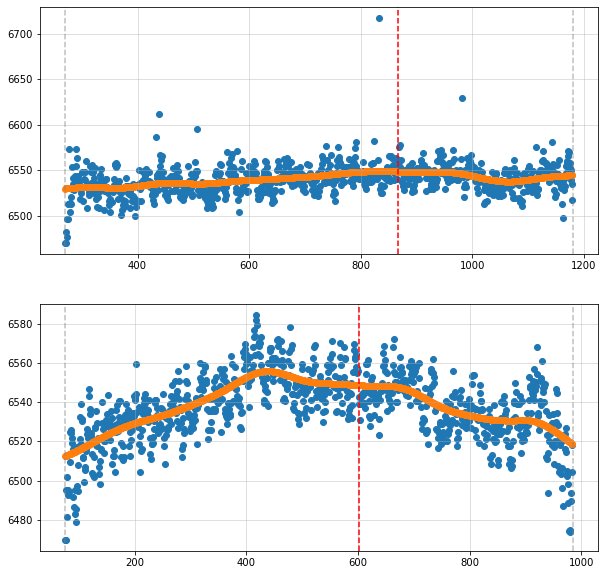

In [125]:
s_gau = 40
stepa = 1

rangesxa = list(range(center[0]-cir_rad,center[0]+cir_rad,stepa))
rangesya = list(range(center[1]-cir_rad,center[1]+cir_rad,stepa))

hxa = hxa[center[0]-cir_rad:center[0]+cir_rad]
hya = hya[center[1]-cir_rad:center[1]+cir_rad]

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

gauss = gaussarr(s_gau)

gx = np.convolve(hxa, gauss, mode = 'same')
#gx = np.convolve(hxa[center[0]-cir_rad:center[0]+cir_rad+1], gauss, mode = 'same')
#rangesxa = rangesxa[center[0]-cir_rad:center[0]+cir_rad+1]
gx = [val/sum(gauss[max(0,3*s_gau-bal):min(6*s_gau,2*cir_rad-bal+3*s_gau)]) for val,bal in zip(gx,range(0,2*cir_rad,1))]

gy = np.convolve(hya, gauss, mode = 'same')
#gy = np.convolve(hya[center[1]-cir_rad:center[1]+cir_rad+1], gauss, mode = 'same')
#rangesya = rangesya[center[1]-cir_rad:center[1]+cir_rad+1]
gy = [val/sum(gauss[max(0,3*s_gau-bal):min(6*s_gau,2*cir_rad-bal+3*s_gau)]) for val,bal in zip(gy,range(0,2*cir_rad,1))]

ax0.scatter(rangesxa, hxa)
ax0.scatter(rangesxa, gx)
ax0.grid(alpha = 0.5)
ax0.axvline(867, linestyle = '--', c = 'r', alpha = 1)
ax0.axvline(center[0]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax0.axvline(center[0]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

ax1.scatter(rangesya, hya)
ax1.scatter(rangesya, gy)
ax1.grid(alpha = 0.5)
ax1.axvline(601, linestyle = '--', c = 'r', alpha = 1)
ax1.axvline(center[1]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax1.axvline(center[1]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

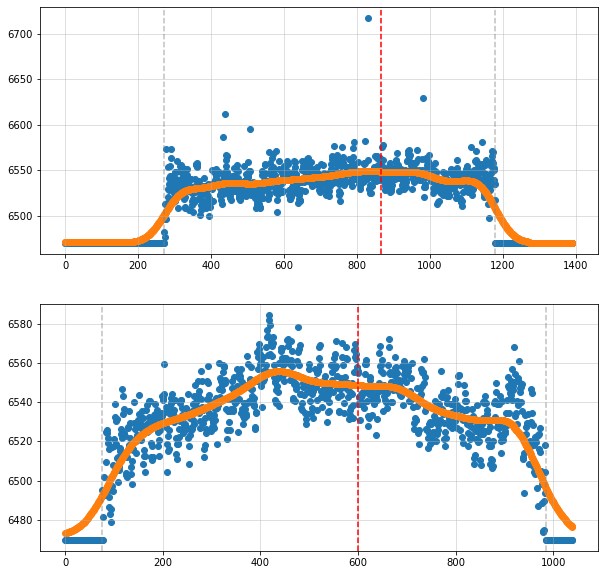

In [122]:
s_gau = 40
stepa = 1

rangesxa = list(range(0,len(carra[0]),stepa))
rangesya = list(range(0,len(carra),stepa))

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

gauss = gaussarr(s_gau)

gx = np.convolve(hxa, gauss, mode = 'same')
#gx = np.convolve(hxa[center[0]-cir_rad:center[0]+cir_rad+1], gauss, mode = 'same')
#rangesxa = rangesxa[center[0]-cir_rad:center[0]+cir_rad+1]
gx = [val/sum(gauss[max(0,3*s_gau-bal):min(6*s_gau,1392-bal+3*s_gau)]) for val,bal in zip(gx,range(0,1392,1))]

gy = np.convolve(hya, gauss, mode = 'same')
#gy = np.convolve(hya[center[1]-cir_rad:center[1]+cir_rad+1], gauss, mode = 'same')
#rangesya = rangesya[center[1]-cir_rad:center[1]+cir_rad+1]
gy = [val/sum(gauss[max(0,3*s_gau-bal):min(6*s_gau,1040-bal+3*s_gau)]) for val,bal in zip(gy,range(0,1040,1))]

ax0.scatter(rangesxa, hxa)
ax0.scatter(rangesxa, gx)
ax0.grid(alpha = 0.5)
ax0.axvline(867, linestyle = '--', c = 'r', alpha = 1)
ax0.axvline(center[0]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax0.axvline(center[0]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

ax1.scatter(rangesya, hya)
ax1.scatter(rangesya, gy)
ax1.grid(alpha = 0.5)
ax1.axvline(601, linestyle = '--', c = 'r', alpha = 1)
ax1.axvline(center[1]-cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)
ax1.axvline(center[1]+cir_rad, linestyle = '--', c = 'grey', alpha = 0.5)

(0.001091, 0.001101)

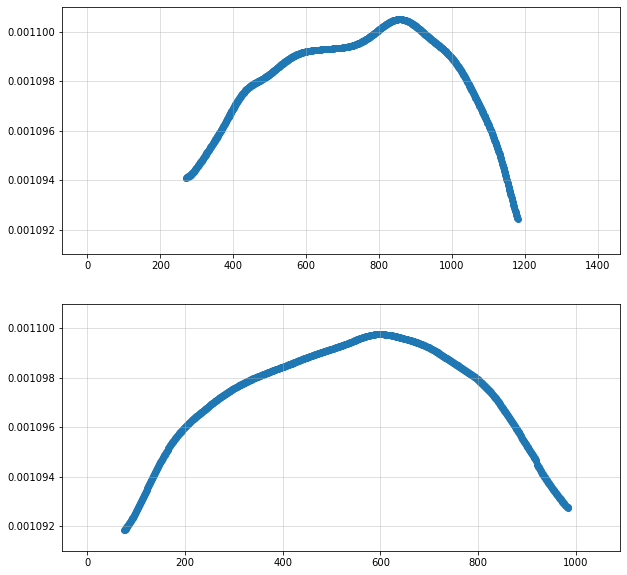

In [12]:
xprob = gx
yprob = gy

xprob = [val if abs(bal-center[0])<=cir_rad else 0 for val,bal in zip(xprob,range(0,1392,1))]
yprob = [val if abs(bal-center[1])<=cir_rad else 0 for val,bal in zip(yprob,range(0,1040,1))]

xprob = [val/simpson(xprob, rangesxa) for val in xprob]
yprob = [val/simpson(yprob, rangesya) for val in yprob]

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

ax0.grid(alpha = 0.5)
ax1.grid(alpha = 0.5)

ax0.scatter(rangesxa,xprob)
ax0.set_ylim(0.001091,0.001101)
ax1.scatter(rangesya,yprob)
ax1.set_ylim(0.001091,0.001101)

In [14]:
viridis = mpl.colormaps['viridis'].resampled(30)

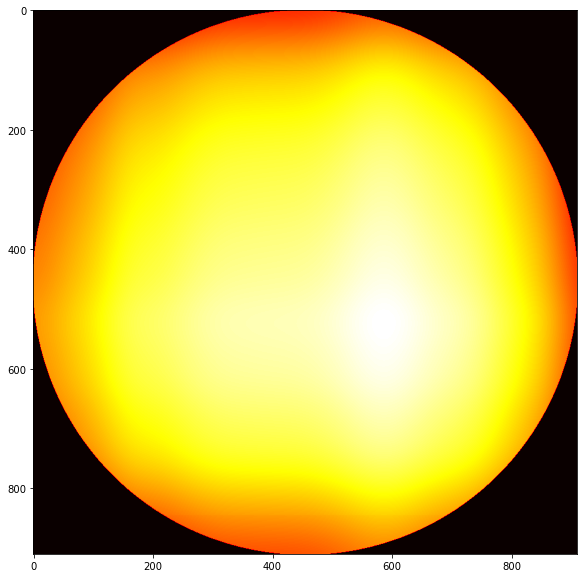

In [30]:
probmat = np.array([[val*bal for val in xprob] for bal in yprob])
probmat = [[val for val in bal[center[0]-cir_rad:center[0]+cir_rad]] for bal in probmat[center[1]-cir_rad:center[1]+cir_rad]]

probmat_min = min([val for bal in probmat for val in bal if val > 0])
probmat_max = max([val for bal in probmat for val in bal if val > 0])

for z in range(len(probmat)):
    for k in range(len(probmat[0])):
        if math.floor(((z-455)**2+(k-455)**2)**0.5) > cir_rad:
            probmat[z][k] = probmat_min

fig = plt.figure(figsize = (10,10))
plt.imshow(probmat, cmap = 'hot') #twilight_shifted, jet

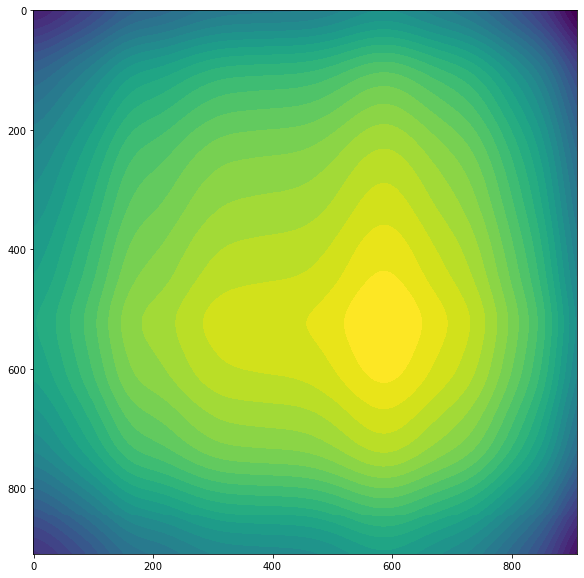

In [229]:
probmat = np.array([[val*bal for val in xprob] for bal in yprob])
probmat = [[val for val in bal[center[0]-cir_rad:center[0]+cir_rad]] for bal in probmat[center[1]-cir_rad:center[1]+cir_rad]]

probmat_min = min([val for bal in probmat for val in bal if val > 0])
probmat_max = max([val for bal in probmat for val in bal if val > 0])

#probmat = [[val if val > 1.2e-6 else 1.2e-6 for val in bal] for bal in probmat]
#probmat = [[val**10 for val in bal] for bal in probmat]
#probmat = [[((val-probmat_min)) if val>0 else 0 for val in bal] for bal in probmat]
#probmat = [[(val**2)*10000000000000 if val>0 else (probmat_lim**2)*10000000000000 for val in bal] for bal in probmat]
#probmat = [[val/probmat_max for val in bal] for bal in probmat]

fig = plt.figure(figsize = (10,10))
plt.imshow(probmat, cmap = viridis) #twilight_shifted, jet

In [170]:
((probmat_max+probmat_min)/2).round(10), ((probmat_max-probmat_min)/2).round(10)

(1.2015e-06, 8.8e-09)

In [122]:
probmat_min, probmat_max

(1.192772491055479e-06, 1.21030413616032e-06)

In [550]:
len([1 for bal in arrab for val in bal if val>19200])

50

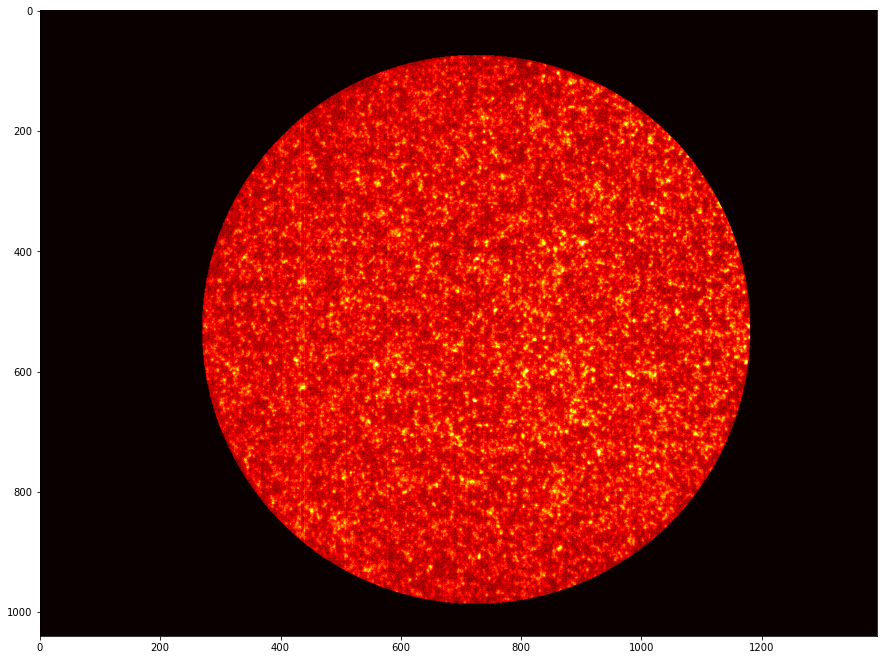

In [552]:
arrab = arra.copy()

arrab[arrab > 19150] = 19150
arrab_lim = min([val for bal in arrab for val in bal if val > 0])

arrab = [[(val-arrab_lim)/1000 if val > 0 else 0 for val in bal] for bal in arrab]

fig = plt.figure(figsize = (15,15))
plt.imshow(arrab, cmap = 'hot')

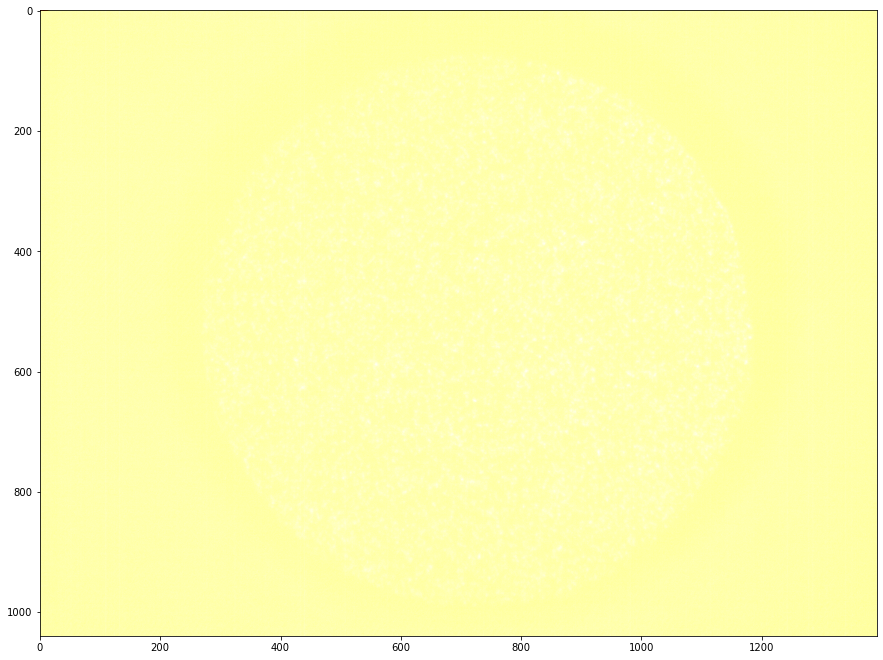

In [78]:
#arra[arra < 17400] = 17400
#arra[arra > 19000] = 19000

fig = plt.figure(figsize = (15,15))
plt.imshow(arra, cmap = 'hot')

In [81]:
np.average(arra)

17921.747272877983

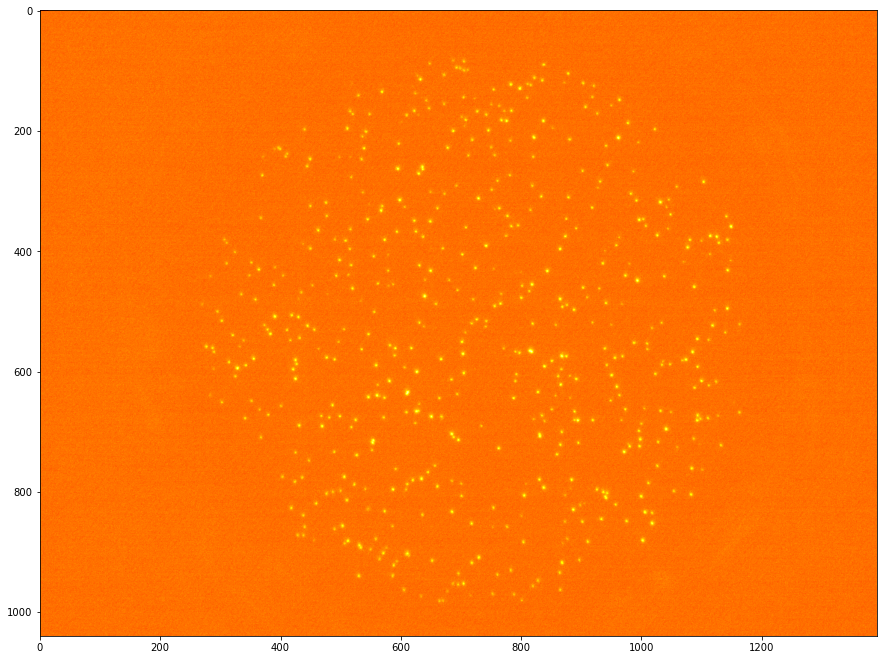

In [327]:
pos = 0

fig = plt.figure(figsize = (15,15))
arr = np.array(Image.open(fl[pos]))
#arr[arr < 700] = 700
cc = cfinder(fl[pos])
thresh = np.average(arr)+3*np.std(arr)
#arr[arr<thresh] = 0.001

#for i in range(len(arr)):
#    for k in range(len(arr[0])):
#        if math.floor(((i-center[1])**2+(k-center[0])**2)**0.5) > cir_rad:
#            arr[i,k] = 0

plt.imshow(arr, cmap = 'hot')
#plt.scatter(center[0], center[1])

In [328]:
sm = 0

for i in range(60):
    i += 0
    tsm = sum([val[i] for val in arr])/(1040*60)
    sm += tsm

print(sm)

811.7800641025642


In [329]:
sm = 0

for i in range(60):
    i += 0
    tsm = sum(arr[i])/(1392*60)
    sm += tsm

print(sm)

809.4920977011496


In [330]:
len([1 for bal in arr for val in bal if val < 700])

17

In [331]:
carr = arr.copy()
#carr[carr<thresh] = 0.0001

avx = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in np.transpose(carr)]
avy = [sum(val)/max(len([1 for bal in val if bal > 0]),1) for val in carr]

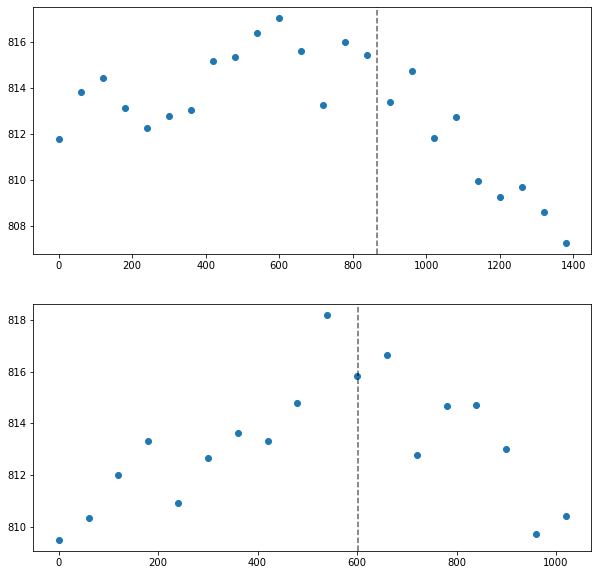

In [332]:
step = 60
rangesx = list(range(0,len(arr[0]),step))
rangesy = list(range(0,len(arr),step))

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

hx = [sum(avx[i:i+step])/max(1, len([1 for val in avx[i:i+step] if val > 0])) for i in range(0,len(carr[0]),step)]
hy = [sum(avy[i:i+step])/max(1, len([1 for val in avy[i:i+step] if val > 0])) for i in range(0,len(carr),step)]

hx = [val if val>1 else min([val for val in hx if val > 1]) for val in hx]
hy = [val if val>1 else min([val for val in hy if val > 1]) for val in hy]

ax0.scatter(rangesx, hx)
ax0.axvline(867, linestyle = '--', c = 'k', alpha = 0.6)
ax1.scatter(rangesy, hy)
ax1.axvline(601, linestyle = '--', c = 'k', alpha = 0.6)

In [160]:
len(rangesx), len(hx)

(1391, 1392)

In [108]:
avx

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [79]:
[sum(val) for val in hx]

[0.0,
 0.0,
 54658.91999999996,
 142959.12000000005,
 147889.31999999995,
 152578.16000000044,
 154933.20000000004,
 152197.48000000004,
 156251.23999999985,
 152726.12000000002,
 141456.4400000001]

In [55]:
np.transpose(arr)[0].shape

(1040,)

In [56]:
len(arr[0])

1392

In [70]:
6//2

3

In [5]:
np.random.choice(10, 5)

array([4, 5, 2, 4, 1])

In [ ]:
np.random.normal(1.1)